In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Чтение набора данных об уровене денежных доходов населения по субъектам российской федерации и набора данных о приросте постоянного населения
## Ссылки на данные: https://showdata.gks.ru/report/278934/, https://rosstat.gov.ru/storage/mediabank/urov_10subg_nm.xlsx



In [88]:
income_df = pd.read_excel('income_data.xlsx')
income_df.head()

,district,region,year,income
0,Центральный федеральный округ,Белгородская область,2021 г.,35510.927696
1,Центральный федеральный округ,Брянская область,2021 г.,31713.154043
2,Центральный федеральный округ,Владимирская область,2021 г.,28148.357000
3,Центральный федеральный округ,Воронежская область,2021 г.,34981.531471
4,Центральный федеральный округ,Ивановская область,2021 г.,30234.953044


In [89]:
population_df = pd.read_excel('population_data.xlsx')
population_df.head()

,district,region,year,growth
0,Центральный федеральный округ,Белгородская область,2021 г.,-8962
1,Центральный федеральный округ,Брянская область,2021 г.,-14420
2,Центральный федеральный округ,Владимирская область,2021 г.,-16807
3,Центральный федеральный округ,Воронежская область,2021 г.,-16521
4,Центральный федеральный округ,Ивановская область,2021 г.,-14717


In [90]:
income_df = income_df.dropna()
population_df = population_df.dropna()

In [91]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  174 non-null    object 
 1   region    174 non-null    object 
 2   year      174 non-null    object 
 3   income    174 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [92]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  174 non-null    object
 1   region    174 non-null    object
 2   year      174 non-null    object
 3   growth    174 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


## Посчитаем коэффициент корреляции

In [93]:
merged_df = pd.merge(income_df, population_df, on=['district','region', 'year'])

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  102 non-null    object 
 1   region    102 non-null    object 
 2   year      102 non-null    object 
 3   income    102 non-null    float64
 4   growth    102 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.1+ KB


In [95]:
# Вычисление коэффициента корреляции
correlation = merged_df['growth'].corr(merged_df['income'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.19771612104312278


## Вывод: наблюдаем положительную слабую

Text(0, 0.5, 'Доход')

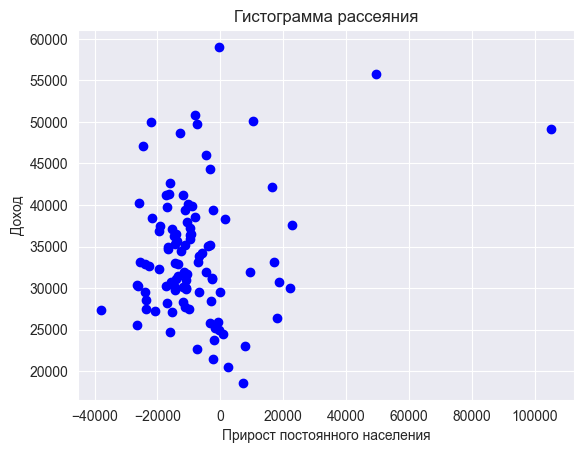

In [97]:
# Строительство гистограммы рассеяния
plt.scatter(merged_df['growth'], merged_df['income'], color='blue', label='Данные')
plt.title('Гистограмма рассеяния')
plt.xlabel('Прирост постоянного населения')
plt.ylabel('Доход')

## Вывод: видим на графике облако точек, что может говорить о взаимосвязности данных

## Построим линию аппроксимации

In [98]:
X = merged_df['growth'].values.reshape(-1, 1)
y = merged_df['income'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

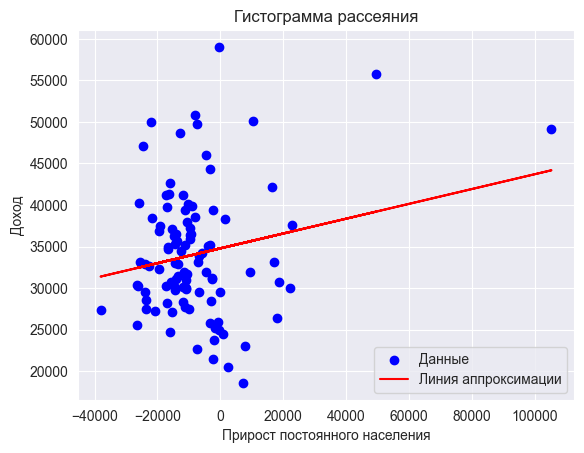

In [99]:
# Построение линии аппроксимации
# Строительство гистограммы рассеяния
plt.scatter(merged_df['growth'], merged_df['income'], color='blue', label='Данные')
plt.title('Гистограмма рассеяния')
plt.xlabel('Прирост постоянного населения')
plt.ylabel('Доход')

plt.plot(X, y_pred, color='red', label='Линия аппроксимации')
plt.legend()
plt.show()

In [101]:
r_squared = model.score(X, y)
print(f'Коэффициент детерминации R²: {round(r_squared, 2)}')

Коэффициент детерминации R²: 0.04


##  Вывод: данные о приросте постоянного населения определяют всего 4% вариации дохода

## Разобьём набор данных на две выборки

In [102]:
# Случайная выборка ~ 1/3 наблюдений
random_sample = merged_df.sample(frac=1/3)

In [103]:
# Стратифицированная выборка по федеральным округам
stratified_sample = merged_df.groupby('district', group_keys=False).apply(lambda x: x.sample(frac=1/3))

In [104]:
# Средние значения
mean_random = random_sample['income'].mean()
mean_stratified = stratified_sample['income'].mean()
mean_population = merged_df['income'].mean()

## Сравним средние значения выборок

In [108]:
print("Среднее значение случайной выборки:", round(mean_random, 2))
print("Среднее значение стратифицированной выборки:", round(mean_stratified),2)
print("Среднее значение генеральной выборки:", round(mean_population),2)

Среднее значение случайной выборки: 32209.31
Среднее значение стратифицированной выборки: 33261 2
Среднее значение генеральной выборки: 34079 2


## Посчитаем доверительные интервалы для средних по выборкам

In [110]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    sem = stats.sem(data)  # стандартная ошибка среднего

    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)  # t-критерий
    return mean - h, mean + h

In [112]:
# Доверительные интервалы
ci_random_90 = confidence_interval(random_sample['income'], confidence=0.90)
ci_random_95 = confidence_interval(random_sample['income'], confidence=0.95)
ci_random_99 = confidence_interval(random_sample['income'], confidence=0.99)

ci_stratified_90 = confidence_interval(stratified_sample['income'], confidence=0.90)
ci_stratified_95 = confidence_interval(stratified_sample['income'], confidence=0.95)
ci_stratified_99 = confidence_interval(stratified_sample['income'], confidence=0.99)

In [115]:
print("Доверительный интервал 90% для случайной выборки:", ci_random_90)
print("Доверительный интервал 95% для случайной выборки:", ci_random_95)
print("Доверительный интервал 99% для случайной выборки:", ci_random_99)

Доверительный интервал 90% для случайной выборки: (30608.36921522218, 33810.24413185412)
Доверительный интервал 95% для случайной выборки: (30284.697746170932, 34133.91560090537)
Доверительный интервал 99% для случайной выборки: (29623.684125785563, 34794.92922129074)


In [116]:
print("Доверительный интервал 90% для стратифицированной выборки:", ci_stratified_90)
print("Доверительный интервал 95% для стратифицированной выборки:", ci_stratified_95)
print("Доверительный интервал 99% для стратифицированной выборки:", ci_stratified_99)

Доверительный интервал 90% для стратифицированной выборки: (30883.00689227037, 35638.559128616806)
Доверительный интервал 95% для стратифицированной выборки: (30401.4621252038, 36120.10389568337)
Доверительный интервал 99% для стратифицированной выборки: (29416.672293468167, 37104.893727419)


In [117]:
print("Сравнение средних значений и доверительных интервалов:")
print(f"Генеральная выборка: {mean_population}")
print(f"Случайная выборка: {mean_random}, Доверительный интервал 95%: {ci_random_95}")
print(f"Стратифицированная выборка: {mean_stratified}, Доверительный интервал 95%: {ci_stratified_95}")

Сравнение средних значений и доверительных интервалов:
Генеральная выборка: 34078.546789459324
Случайная выборка: 32209.30667353815, Доверительный интервал 95%: (30284.697746170932, 34133.91560090537)
Стратифицированная выборка: 33260.783010443585, Доверительный интервал 95%: (30401.4621252038, 36120.10389568337)


## Вывод: среднее значение генеральной выборки попадает в 95%-е доверительные интервалы обеих выборок, однако для случайной выборки среднее генеральной выборки почти выходит за его границы, что говорит о том, что стратифицированная выборка лучше соотносится с распределением генеральной выборки.